#### Lending Case Study - Factors affecting the likelihood of loan default

The notebook will consist of the following:
- Loading and looking at the data
- Data understanding
- Data modification
  * Data cleanig and imputing(if necessary)
- Data Analysis

##### Importing the necessary libraries

In [36]:
import pandas as pd
import numpy as np

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("loan.csv")

In [39]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

### Data understanding

As stated in the problem statement, the given dataset contains information about the past loan applicants and who have either defaulted or not. Our objective is to identify the variables/factors that will likely lead to a loan applicant defaulting. After looking at the dataset, loan_status is the variable which informs us who have defaulted, who have not and the rest(current) which is irrelevant in this case. The logical thing to do is analyse how the rest of the relevant variables in the dataset behave, relate and/or fair against our target variable, loan_status.


Off the bat, some relevamnt variables can be the loam_amnt, annual_inc, emp_length, dti, etc. 

We will clean up the dataset and compare the rest of the relevant variables with loan_status and identify the ones which contributes to the likelihood of default rate.

### Data Cleaning

### Remove Duplicates rows

In [4]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 111)


In [17]:
# checking for missing columns
null_percentage = 100 * df.isnull().mean()
sorted_null_percentage = null_percentage.sort_values(ascending=False)

In [8]:
sorted_null_percentage.head(55)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

##### Removing colums with 100-90 % missing values in columns

In [5]:
df=df.drop(["annual_inc_joint","max_bal_bc","mo_sin_old_rev_tl_op","mo_sin_old_il_acct", "bc_util", "bc_open_to_buy", "avg_cur_bal", "acc_open_past_24mths", "inq_last_12m", "total_cu_tl", "inq_fi", "total_rev_hi_lim", "all_util", "open_rv_24m", "mo_sin_rcnt_tl", "open_rv_12m", "mths_since_last_major_derog", "il_util", "total_bal_il", "mths_since_rcnt_il", "dti_joint", "verification_status_joint", "open_il_24m", "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_il_12m", "mo_sin_rcnt_rev_tl_op", "num_op_rev_tl", "num_bc_sats", "percent_bc_gt_75", "pct_tl_nvr_dlq", "num_tl_op_past_12m", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_sats", "num_rev_tl_bal_gt_0", "num_rev_accts", "num_il_tl", "num_bc_tl", "open_il_6m", "num_actv_rev_tl", "mths_since_recent_revol_delinq", "mort_acc", "num_actv_bc_tl", "num_accts_ever_120_pd", "mths_since_recent_bc", "mths_since_recent_bc_dlq", "mths_since_recent_inq", "next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq", "next_pymnt_d", "mths_since_last_record", "total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"], axis=1)

In [19]:
df.shape

(39717, 55)

In [23]:
null_percentage = 100 * df.isnull().mean()
sorted_null_percentage = null_percentage.sort_values(ascending=False)

In [21]:
sorted_null_percentage.head(20)

tot_hi_cred_lim               100.000000
desc                           32.585543
emp_title                       6.191303
emp_length                      2.706650
pub_rec_bankruptcies            1.754916
last_pymnt_d                    0.178765
collections_12_mths_ex_med      0.140998
chargeoff_within_12_mths        0.140998
revol_util                      0.125891
tax_liens                       0.098195
title                           0.027696
last_credit_pull_d              0.005036
total_acc                       0.000000
initial_list_status             0.000000
out_prncp                       0.000000
out_prncp_inv                   0.000000
total_pymnt                     0.000000
total_pymnt_inv                 0.000000
total_rec_prncp                 0.000000
acc_now_delinq                  0.000000
dtype: float64

In [6]:
# Missed one will remove that here
df = df.drop(["tot_hi_cred_lim"], axis=1)

In [24]:
sorted_null_percentage.head(20)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
dtype: float64

In [26]:
## Looking at desc column to see if it will be relevant
df["desc"].head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

In [7]:
# Removing desc column as it have too many string values (sentences and even paragrapghs) which will not be needed in further analysis
df = df.drop(["desc"], axis=1)

In [28]:
df.shape

(39717, 53)

### Now it seems removing single values in the columns will be the next step, so we will do that next

In [8]:
single_values = df.columns[df.nunique() == 1].to_list()
single_values

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [9]:
# Removing the single value columns 
columns_to_drop = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
df = df.drop(columns_to_drop, axis=1)

In [31]:
df.shape

(39717, 44)

In [48]:
df.pub_rec_bankruptcies.fillna('NA',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

0


###  cleaning pub_rec_bankruptcies column. 
The values are either 0, 1, 0r 2. Instead of removing them, i will replace them with NA. It seems reasonable to assume that prior history of banckruptcy will influence loan defaulting tendency. 

In [47]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

### Data analysis

After refering to the dictoinary and cross-checking it with the dataset, the next step is to remove columns that are irrelevant for the data analysis, so few more cleaning steps are required 

##### Next uniques values like the id number, url and member_id will be removes as we have no need of them for data analysis

In [10]:
unique_columns = ['id', 'member_id', 'url']
df = df.drop(unique_columns, axis=1)

In [11]:
df.shape

(39717, 41)

### Left with 41 columns:
- columns like "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state" are not likely to contribute to any meaningful analysis in this case study. 
"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
 

In [36]:
df[['title', "emp_title", "zip_code", "last_credit_pull_d", "addr_state"]].head(10)

,title,emp_title,zip_code,last_credit_pull_d,addr_state
0,Computer,NaN,860xx,May-16,AZ
1,bike,Ryder,309xx,Sep-13,GA
2,real estate business,NaN,606xx,May-16,IL
3,personel,AIR RESOURCES BOARD,917xx,Apr-16,CA
4,Personal,University Medical Group,972xx,May-16,OR
5,My wedding loan I promise to pay back,Veolia Transportaton,852xx,Jan-16,AZ
6,Loan,Southern Star Photography,280xx,May-16,NC
7,Car Downpayment,MKC Accounting,900xx,Dec-14,CA
8,Expand Business & Buy Debt Portfolio,NaN,958xx,Aug-12,CA
9,Building my credit history.,Starbucks,774xx,Mar-13,TX


In [12]:
df = df.drop(["title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state"], axis=1)

In [13]:
### Removing the following columns as they seem irrelevant 
df = df.drop(["out_prncp_inv", "total_pymnt_inv", "funded_amnt"], axis=1)

##### The rest of the columns that can be clearly referred to as post-loan approval columns will be now removed as they are irrelevant for the data analyses required here

In [39]:
df[['delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']].head()

,delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,0,13648,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62
1,0,1687,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66
2,0,2956,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91
3,0,5598,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48
4,0,27783,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79


In [14]:
post_loan_cols = ["last_pymnt_d", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt"]

In [15]:
df = df.drop(post_loan_cols, axis=1)

In [16]:
df.shape

(39717, 16)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  pub_rec_bankruptcie

In [45]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0


- The variable "int_rate" are numerical values but is identified as object because of '%'. Will convert them into float by removing % 

In [17]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

#### It does not seem appropriate to impute the missing values in the emp_length column with mean or mode, so we will just remove them

In [18]:
df = df[~df['emp_length'].isnull()]

# Next- will extarct non-numeric charaters and convert the data type from object to integer
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   funded_amnt_inv       38642 non-null  float64
 2   term                  38642 non-null  object 
 3   int_rate              38642 non-null  float64
 4   installment           38642 non-null  float64
 5   grade                 38642 non-null  object 
 6   sub_grade             38642 non-null  object 
 7   emp_length            38642 non-null  int64  
 8   home_ownership        38642 non-null  object 
 9   annual_inc            38642 non-null  float64
 10  verification_status   38642 non-null  object 
 11  issue_d               38642 non-null  object 
 12  loan_status           38642 non-null  object 
 13  purpose               38642 non-null  object 
 14  dti                   38642 non-null  float64
 15  pub_rec_bankruptcies  38

### I will now segregate the coulumns into categorical variables, continuous variables and extra

- Categorical variables
  * term, grade, sub_grade, home_ownership, verification_status,loan_status,purpose, pub_rec_bankruptcies)
- Numerical variables
  * loan_amnt, funded_amnt_inv, int_rate,installment,emp_length, annual_inc, dti
- Extra
  * issue_d

In [5]:
df['annual_inc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: annual_inc
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [19]:
Categorical_cols = ["term", "grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "pub_rec_bankruptcies"]
Numerical_cols = ["loan_amnt", "funded_amnt_inv", "int_rate", "installment", "emp_length", "annual_inc", "dti"]

#### Univariate Analysis

- **Numerical variables**

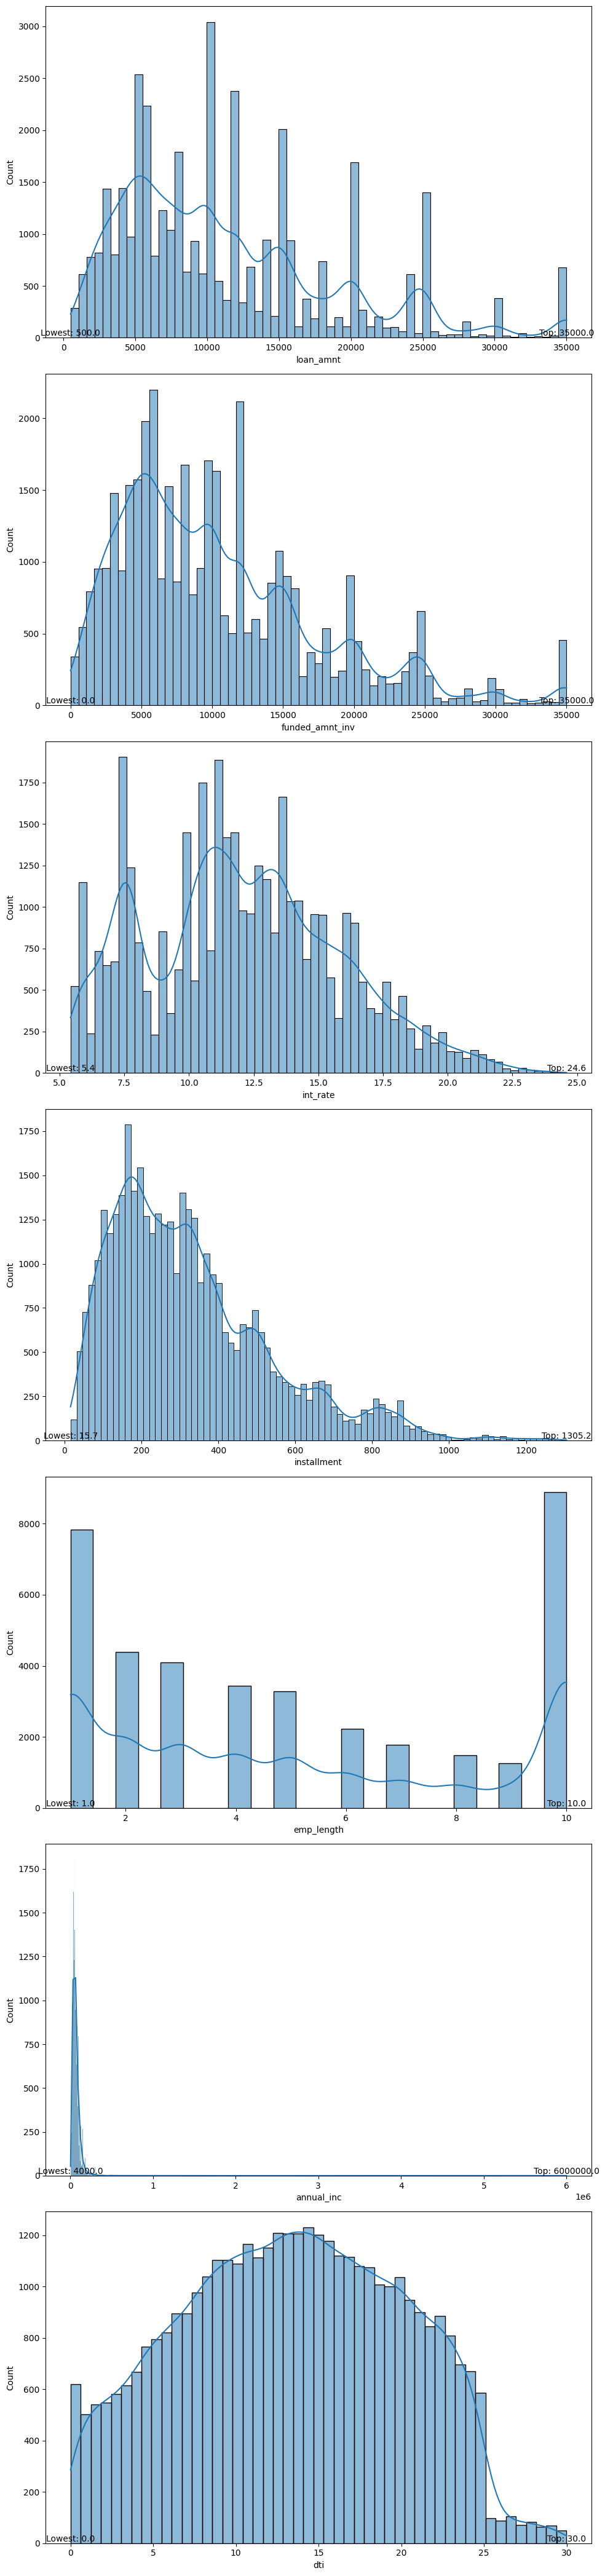

In [55]:
# Numerical columns/variables
# First, Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(Numerical_cols), ncols=1, figsize=(10, 6 * len(Numerical_cols)))

# Iterate through each numerical column
for i, column in enumerate(Numerical_cols):
    # Plot the histogram for the current column
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

    # Add centered percentage labels to the x-axis for the top and lowest values
    top_value = df[column].max()
    lowest_value = df[column].min()
    top_label = f'Top: {top_value:.1f}'
    lowest_label = f'Lowest: {lowest_value:.1f}'
    axes[i].annotate(top_label, (top_value, 0), ha='center', va='bottom')
    axes[i].annotate(lowest_label, (lowest_value, 0), ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

#### Observations:
The above histogram plots show the distribution of the numerical variables
- Loan amount- largest $35000 an the smallest $500. The highest count being $10000
- funded_amnt_inv- largest $35000 an the smallest $0. The highest count being in the range of $5000-$6000
- int_rate- largest 24.6% an the smallest 5.6%. he highest count being 7-7.5 %
- installment- largest 1300 an the smallest 15.7. he highest count being 100-200
- emp_length- longest 10 years an the shortest 1 year. he highest count being 10 years
- annual_inc- largest 6 million dollars(clearly an outlier) an the smallest 4000 dollars. 
- dti- lowest 0 and top 30. 15 being the highest count. 

### Removing Outliers
- We sae that the annual_income definitely contains outliers so we will be removing them

<Axes: xlabel='annual_inc'>

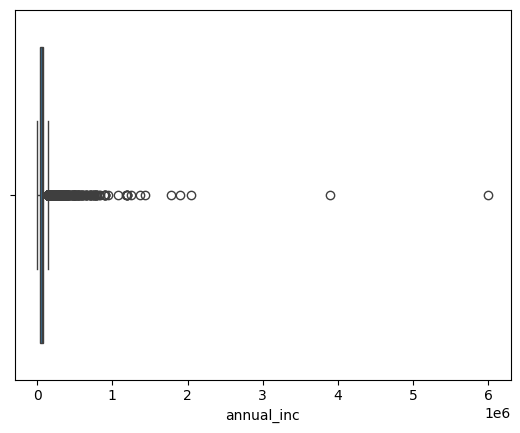

In [28]:
sns.boxplot(x=df['annual_inc'])

<Axes: xlabel='annual_inc'>

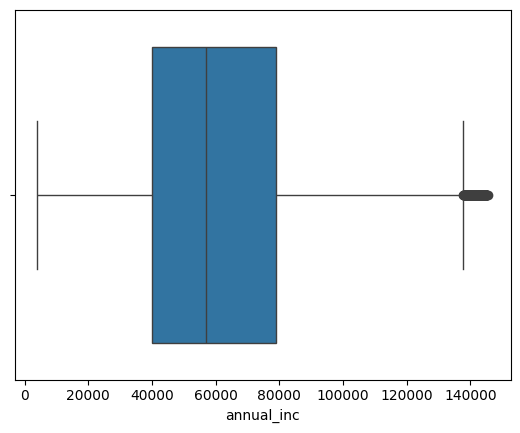

In [29]:
## Calulating the IQR of annul_inc and removing outliers
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['annual_inc'] < (Q1 - 1.5 * IQR)) | ((df['annual_inc'] > (Q3 + 1.5 * IQR))))]
# Checking wheter the outliers are removed
sns.boxplot(x=df['annual_inc'])

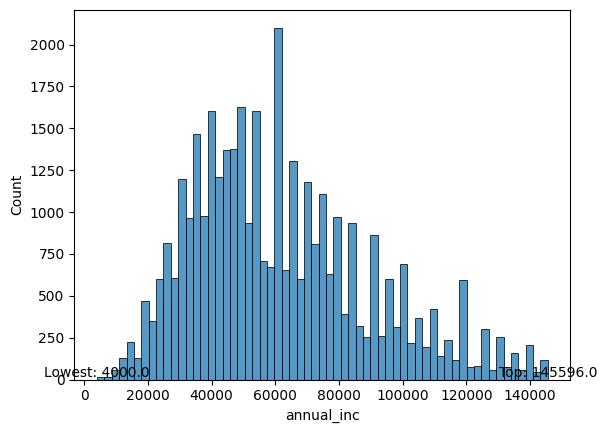

In [35]:
sns.histplot(df['annual_inc'])
# Get the top and lowest values
top_value = df['annual_inc'].max()
lowest_value = df['annual_inc'].min()

# Add centered percentage labels to the x-axis for the top and lowest values
top_label = f'Top: {top_value:.1f}'
lowest_label = f'Lowest: {lowest_value:.1f}'
plt.annotate(top_label, (top_value, 0), ha='center', va='bottom')
plt.annotate(lowest_label, (lowest_value, 0), ha='center', va='bottom')

plt.show()

##Observation:
- annual_inc- largest $145596 an the smallest 4000 dollars. # 

- **Categorical Variable**

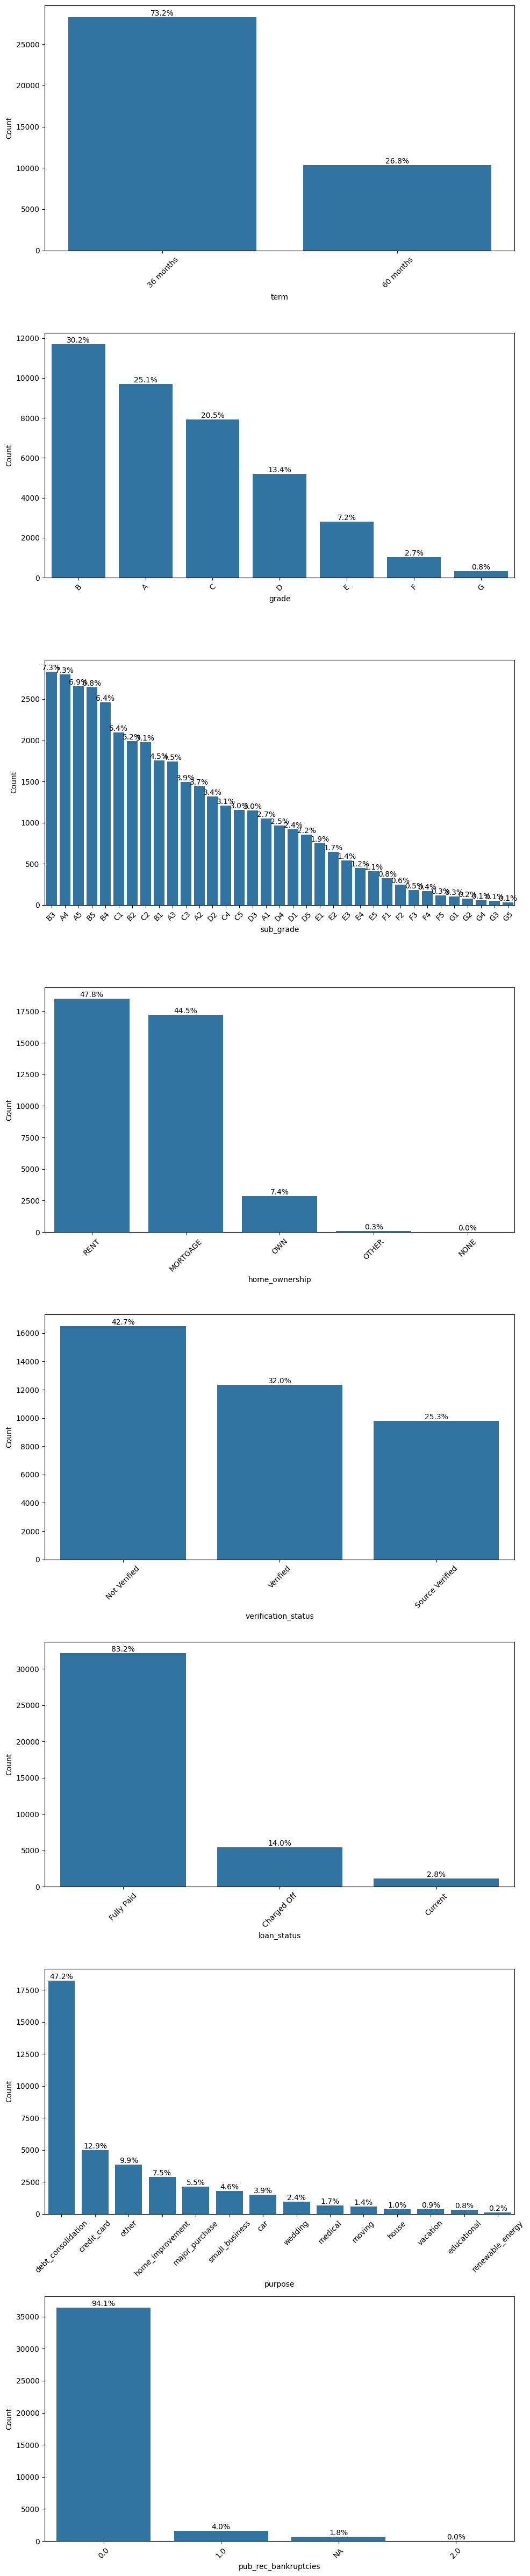

In [56]:
## For the rest of the categorical columns
# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=len(Categorical_cols), ncols=1, figsize=(10, 6 * len(Categorical_cols)))

# Iterate through each categorical column
for i, column in enumerate(Categorical_cols):
    counts = df[column].value_counts()
    total_count = counts.sum()
    percentage_counts = counts / total_count * 100

    # Plot the countplot for the current column
    sns.countplot(data=df, x=column, order=counts.index, ax=axes[i])
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

    # Add centered percentage labels to the countplot
    for j, count in enumerate(counts):
        axes[i].text(j, count, f'{percentage_counts[j]:.1f}%', ha='center', va='bottom')
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for readability

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

#### Observations
- Term- 73.2% of the loans were 36 months and 26.6% were 60 months.
- Grade- Grade b has the highest count whereas grade G has the lowest
- Sub-grade- sub-grade B3 has the highest count while grade G5 the lowest. 
- Home ownership- Applicants who rent has the highest count, followed by mortgage.
- Verification status- Not verified has the highest count.
- Loan_status- 83.2% are non-defaulters and 14% are defaulters. 


### Bivariate Analysis

##### Modifying target variable before proceeding to bivariate analysis

In [57]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

##### Since we are only concerend with whether the customer has defaulted or not, the current value is irrelevant. The remaing two values of interest i.e. "Fully Paid" and "Charged Off" which indicates the "non-defaulters" and "defaulters" respectively will be converted to binary values 0 and 1 for simplifying our further analysis that will be carried out

In [58]:
# Removing the "Current" values from the loan_status col
df = df[df['loan_status'] != 'Current']
# Converting the remaining two values to intergers 0 or 1
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df['loan_status'] = pd.to_numeric(df['loan_status'])

In [59]:
df['loan_status'].dtype

dtype('int64')

In [60]:
df['loan_status'].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

#### Now we will calculate the default rate 

In [61]:
default_rate = round(df['loan_status'].mean(), 2)
print(default_rate)

0.14


A default rate of 14% means that approximately 14% of the loans in the dataset have defaulted. In this context, "default" typically refers to loans that have not been repaid or are in a state of delinquency.

To classify loans as "good" or "bad" based on this default rate, it's common to use the rate as a threshold. In this case, loans with a default rate exceeding 14% (i.e., higher than 14%) are often categorized as "bad" loans, while loans with a default rate below 14% (i.e., lower than 14%) are considered "good" loans.

So, in this scenario:

Loans with a default rate exceeding 14% would be classified as "bad" loans.
Loans with a default rate below 14% would be classified as "good" loans.
 This threshold can be adjusted based on the specific risk tolerance and business objectives.

#### Determining the deafault rates across the categorical variables against loan_status

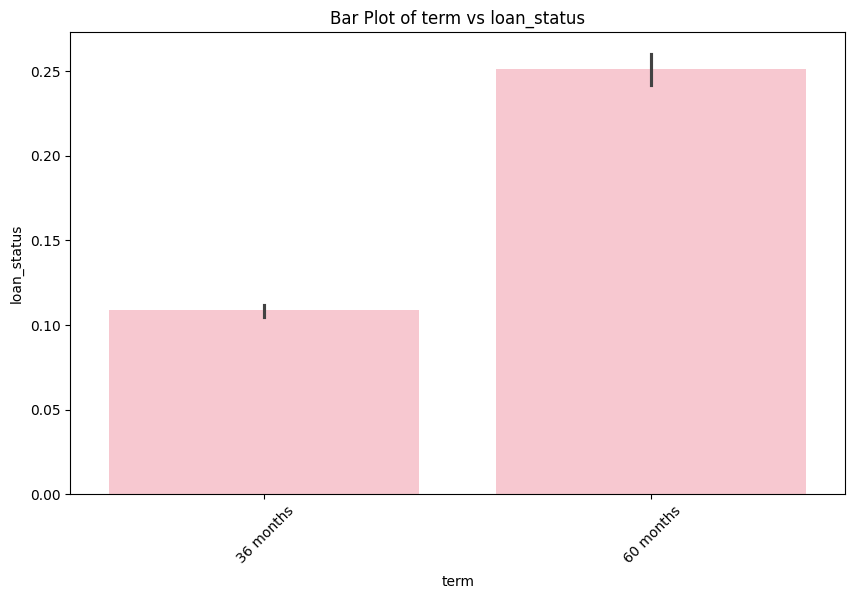

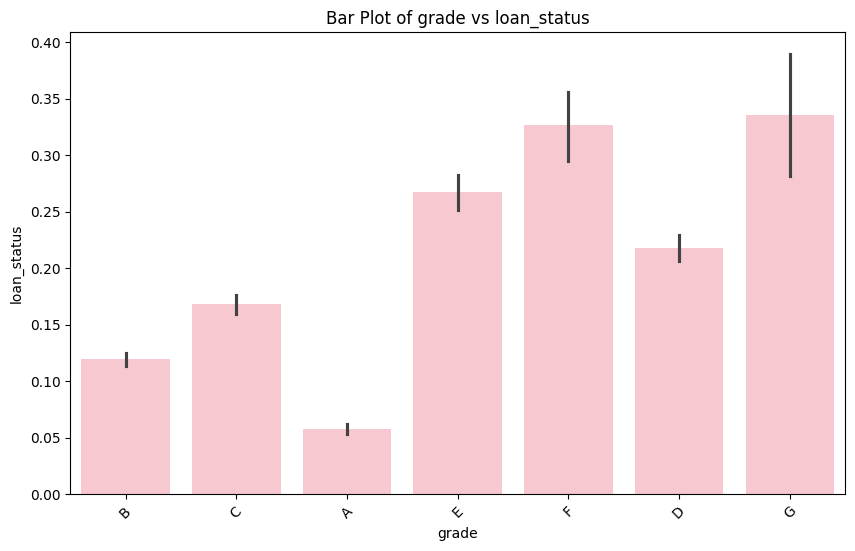

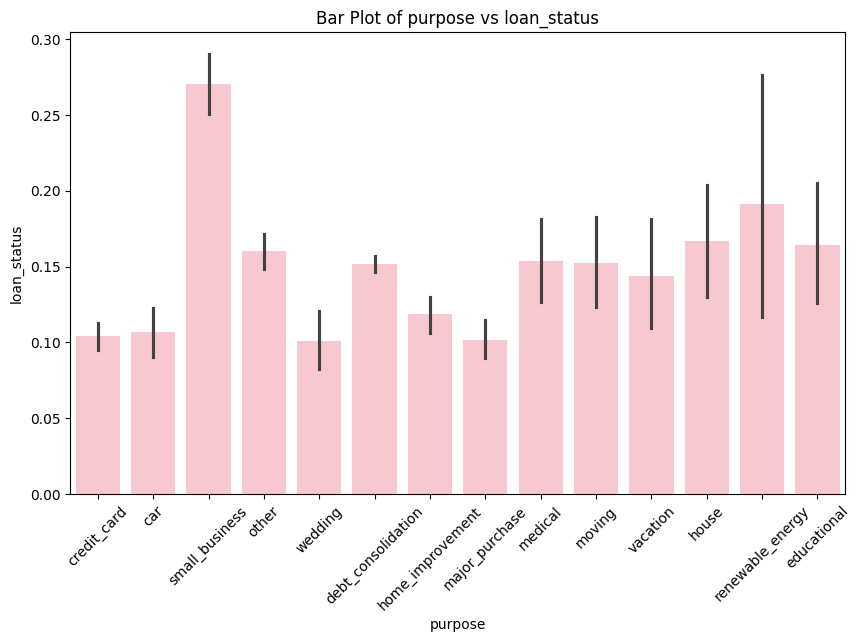

In [92]:
Categorical_cols = ["term", "grade", "purpose"]
target_variable = 'loan_status'

# Setting a common color for all bar plots
bar_color = 'pink'

for col in Categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y=target_variable, data=df, color=bar_color)
    plt.title(f'Bar Plot of {col} vs {target_variable}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()

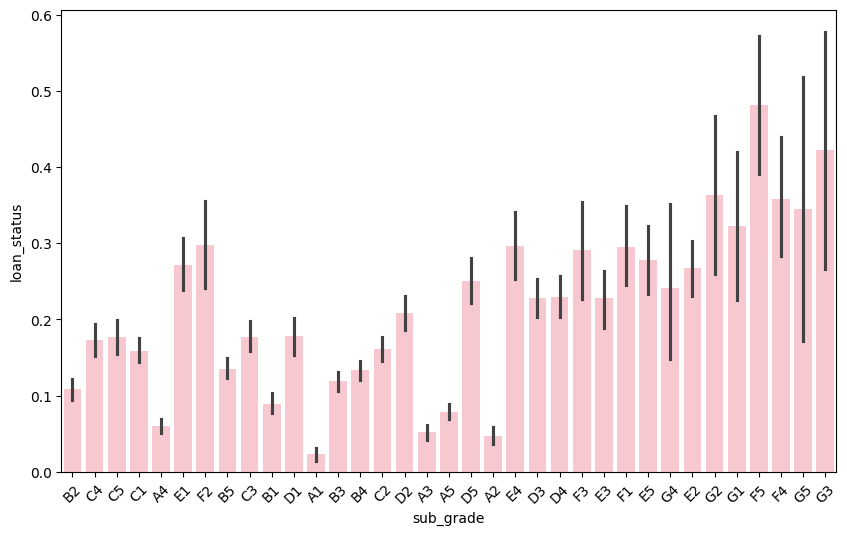

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x="sub_grade", y="loan_status", data=df, color=bar_color)
plt.xticks(rotation=45)
plt.show()

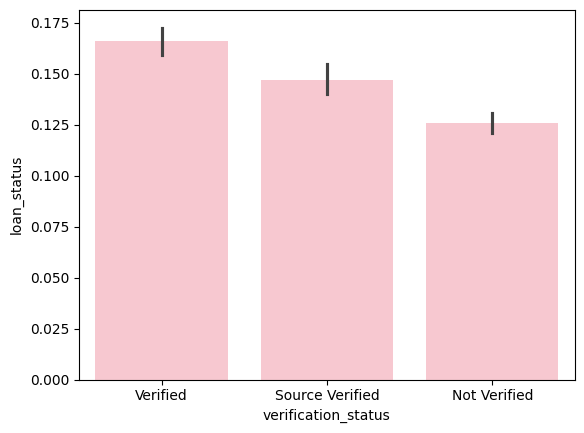

In [95]:

sns.barplot(x="verification_status", y="loan_status", data=df, color=bar_color)

plt.show()

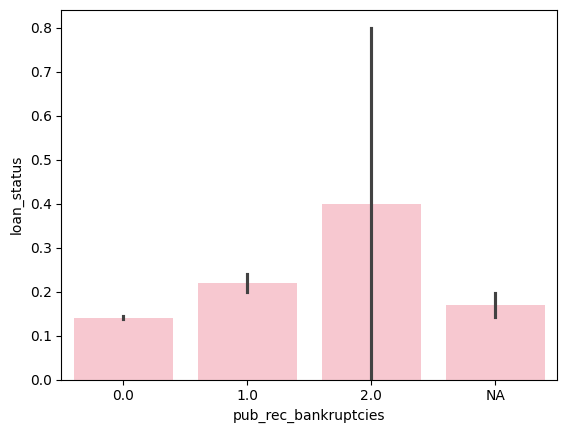

In [96]:
sns.barplot(x="pub_rec_bankruptcies", y="loan_status", data=df, color=bar_color)
plt.show()

### Observations:
- Term - Default rates are higher in the 60 months term than in the 30 months term
- Grade- Grades G, F, E and D show higher default rates., G grade being the highest 
- Purpose- Small business have the highest default rate followed by renewable energy, educational, house and debt consolidation. 
- Verification Status- Income verified via the LC has higher default rate
- Public record of bankruptcies(pub_rec_banckruptcies)- Cases where at least 2 bankruptcies have been recorded show higher default rate
 -Subgrade- Like the grade variable, lower grade such as F5, G3, E2 show higher default rates.  



#### Derived metrics is a concept that was taught in the EDA module - we will be extracting year and month from the issue_d column to make separate columns

In [67]:
# Extracting year and month
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d'].dt.month

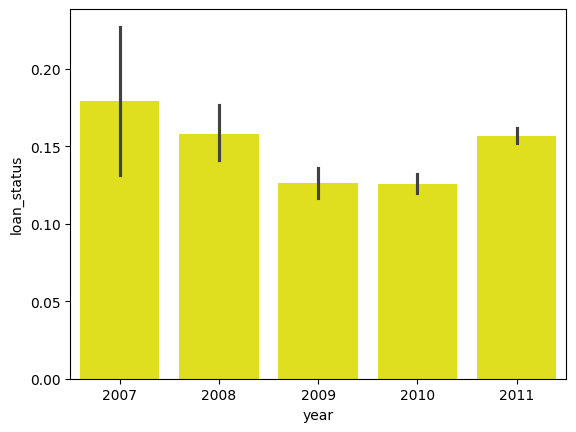

In [90]:
sns.barplot(x='year', y='loan_status', data=df, color='yellow')
plt.show()

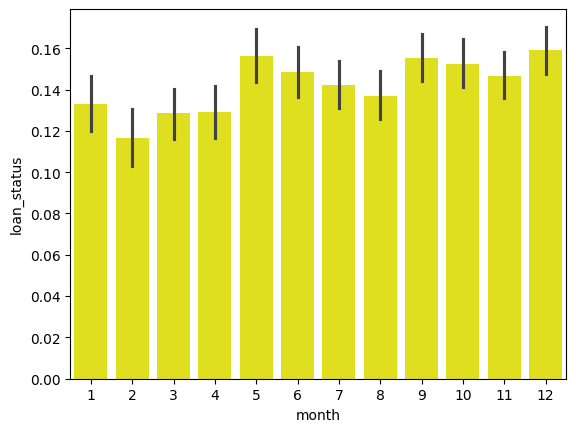

In [91]:
sns.barplot(x='month', y='loan_status', data=df, color='yellow')
plt.show()

#### Bucketing numerical variables to make it categorical and plotting bar graphs

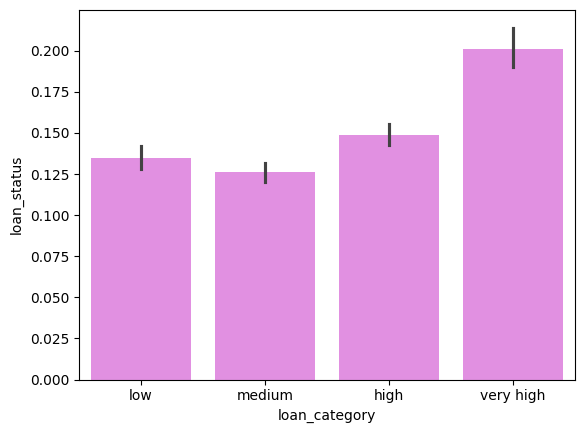

In [73]:
# Define bin edges
low_bin = 5000
medium_bin = 10000
high_bin = 20000


# Create a new categorical column based on binning
df['loan_category'] = df['loan_amnt'].apply(lambda x: 'low' if x <= low_bin else (
    'medium' if x <= medium_bin else ('high' if x <= high_bin else 'very high')))
sns.barplot(x='loan_category', y='loan_status', data=df, color='violet')
plt.show()

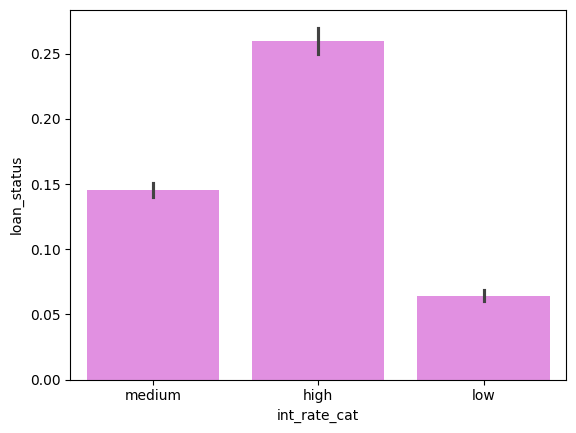

In [74]:
# Define bin edges
low_bin = 10
medium_bin = 15

# Create a new categorical column based on binning
def categorize_int_rate(rate):
    if rate <= low_bin:
        return 'low'
    elif rate <= medium_bin:
        return 'medium'
    else:
        return 'high'

df['int_rate_cat'] = df['int_rate'].apply(categorize_int_rate)
sns.barplot(x='int_rate_cat', y='loan_status', data=df, color='violet')
plt.show()

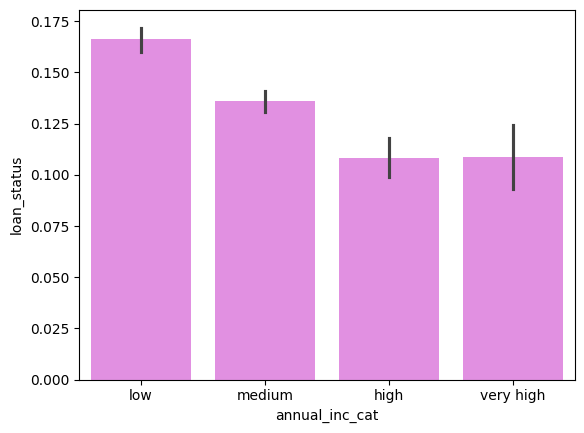

In [75]:
# Define a custom function to categorize annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n <= 100000:
        return 'medium'
    elif n <= 150000:
        return 'high'
    else:
        return 'very high'

# Apply the custom function to create the 'annual_inc_category' column
df['annual_inc_cat'] = df['annual_inc'].apply(annual_income)
sns.barplot(x='annual_inc_cat', y='loan_status', data=df, color='violet')
plt.show()

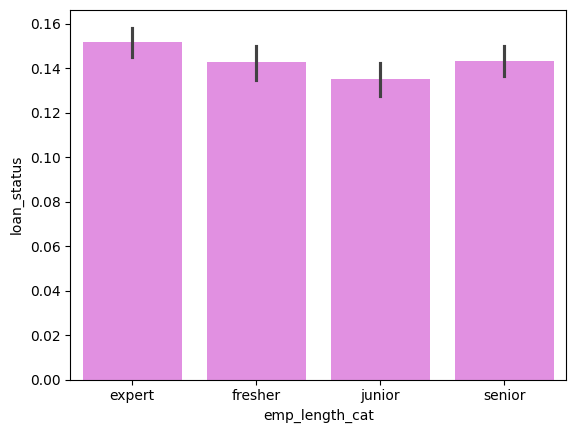

In [76]:
# Define a custom function to categorize employment length
def emp_length_category(n):
    if n <= 1:
        return 'fresher'
    elif n <= 3:
        return 'junior'
    elif n <= 7:
        return 'senior'
    else:
        return 'expert'

# Apply the custom function to create the 'emp_length_category' column
df['emp_length_cat'] = df['emp_length'].apply(emp_length_category)
sns.barplot(x='emp_length_cat', y='loan_status', data=df, color='violet')
plt.show()

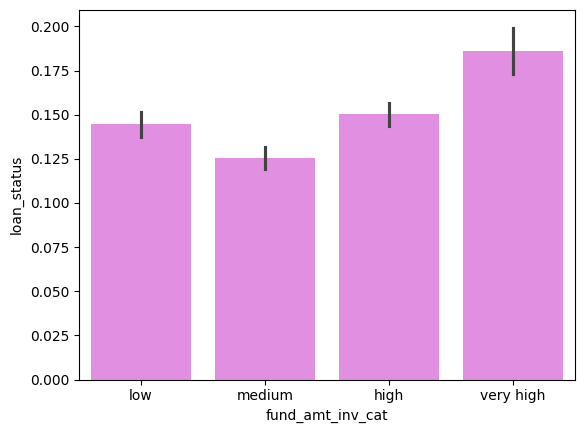

In [77]:
# Define bin edges
low_bin = 5000
medium_bin = 10000
high_bin = 20000

# Create a new categorical column based on binning
df['fund_amt_inv_cat'] = df['funded_amnt_inv'].apply(lambda x: 'low' if x <= low_bin else (
    'medium' if x <= medium_bin else ('high' if x <= high_bin else 'very high')))
sns.barplot(x='fund_amt_inv_cat', y='loan_status', data=df, color='violet')
plt.show()

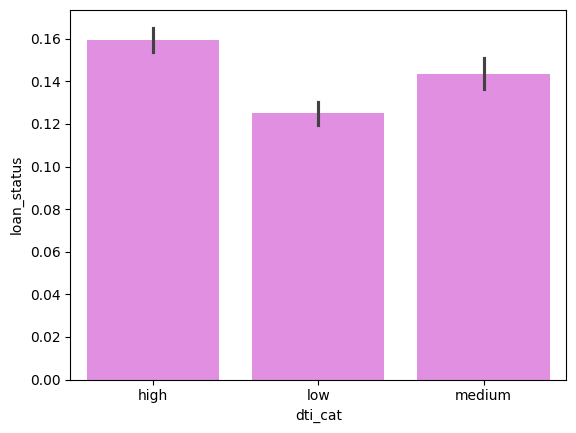

In [78]:
# Define bin edges
low_bin = 10
medium_bin = 15

# Create a new categorical column based on binning
def cat_dti(ratio):
    if ratio <= low_bin:
        return 'low'
    elif ratio <= medium_bin:
        return 'medium'
    else:
        return 'high'

df['dti_cat'] = df['dti'].apply(cat_dti)
sns.barplot(x='dti_cat', y='loan_status', data=df, color='violet')
plt.show()

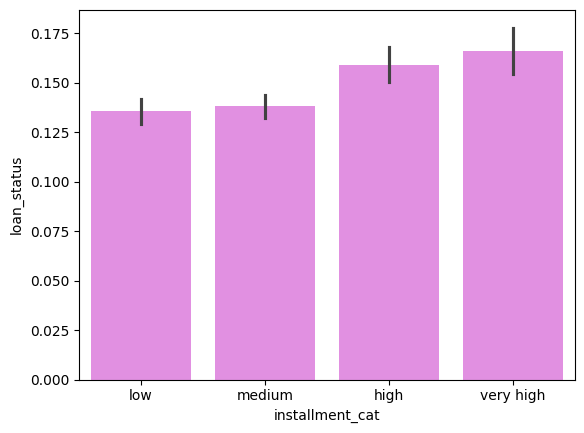

In [79]:
def installment_category(n):
    if n <= 200:
        return 'low'
    elif n <= 400:
        return 'medium'
    elif n <= 600:
        return 'high'
    else:
        return 'very high'

# Apply the custom function to create the 'installment_category' column
df['installment_cat'] = df['installment'].apply(installment_category)
sns.barplot(x='installment_cat', y='loan_status', data=df, color='violet')
plt.show()

### Observations:
- Annual income- Lower income customers default more than high to very high income customers.
- Loan amount (loan_category)- Customers who take very high amount of loans default the most. 
- Interest rate(int_rate_cat)- Highest default rate are seen for loan with high interest rate, followed by medium. Low interest rates have very low default rate. 
- Employment length(emp_length_cat)- Customers with more than 7 years of employment length slighted higher rate of defaulting than those below. 
- Installment- Very high (>600) and high installments have higher default rate than medium to low.
- Debt to income ratio(dti_cat)- High dti has the highest default rate, followed by medium and low dti. 



### Heatmap

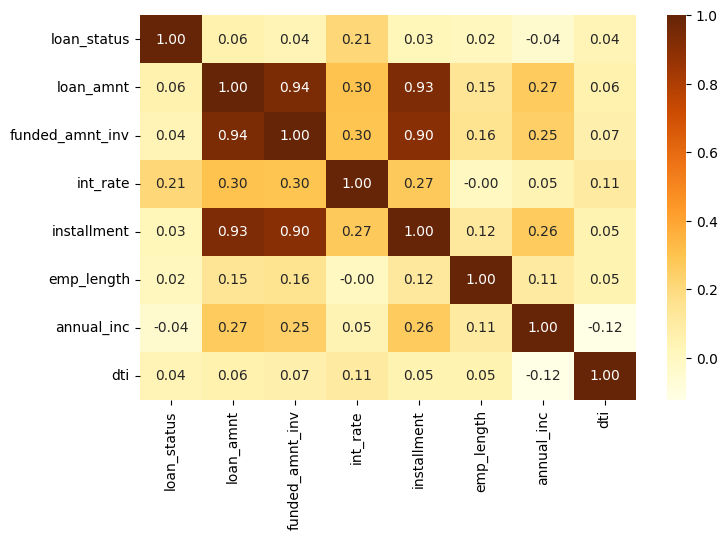

In [80]:
# heat map
plt.figure(figsize=(8,5))
sns.heatmap(df[["loan_status", "loan_amnt", "funded_amnt_inv", "int_rate", "installment", "emp_length", "annual_inc", "dti"]].corr(),annot=True,fmt='.2f', cmap='YlOrBr')
plt.show()

#### Observation
- Loan_amnt and funded_amnt_inv have a correlation coefficient of 0.94 which is pretty high and expected as almost all the values in both the columns are the same. 
- Now, the loan_amnt and installement variables have a correlation coefficient of 0.90, we can plot a scatterplot to see if they have a linear relationship

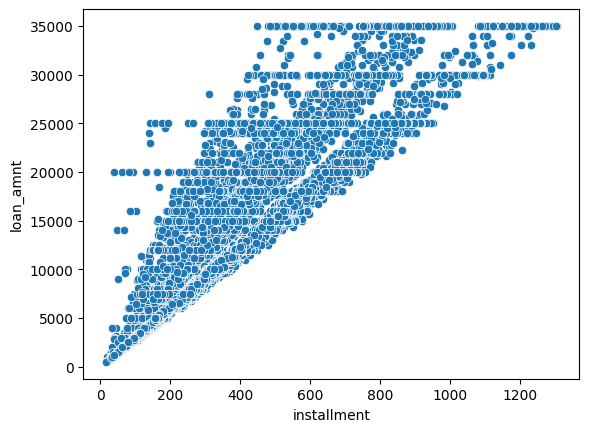

In [81]:
sns.scatterplot(x=df['installment'], y=df['loan_amnt'])
plt.show()

#### Obseravtion:  
- According to the scatter plot, loan_amnt and installement variables seem to have a linear relationship as determined by the heatmap

#### Transformation 

- We will now transform the numerical variables to create pseudo variables such as log of the variable, inverse, square, square root, cube, sigmoid, tanh. 
- The purpose of this is to explore all non-linear relationships. 

<Axes: >

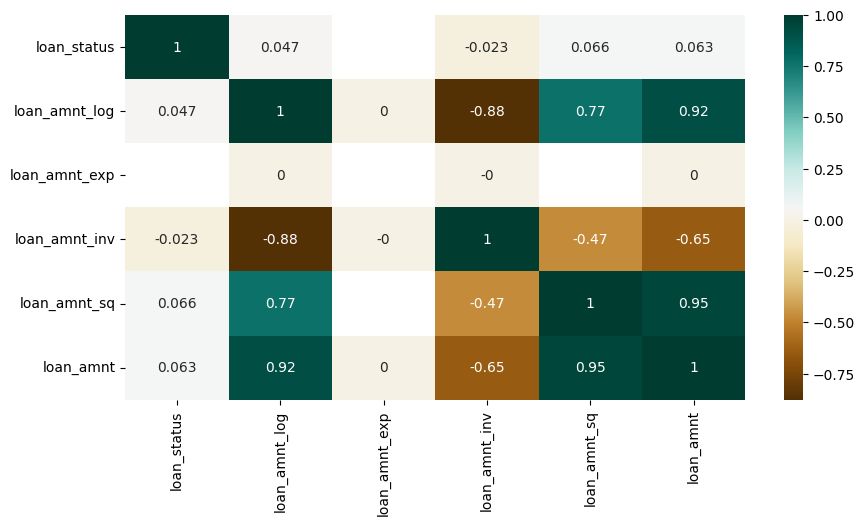

In [82]:
df['loan_amnt_log'] = np.log(df['loan_amnt']) 
df['loan_amnt_exp'] = np.exp(df['loan_amnt']) 
df['loan_amnt_inv'] = 1/(df['loan_amnt']) 
df['loan_amnt_sq'] = df['loan_amnt'] * df['loan_amnt'] 
plt.figure(figsize=(10,5)) 
c= df[['loan_status','loan_amnt_log','loan_amnt_exp','loan_amnt_inv','loan_amnt_sq','loan_amnt']].corr()
sns.heatmap(c,cmap="BrBG",annot=True) 

<Axes: >

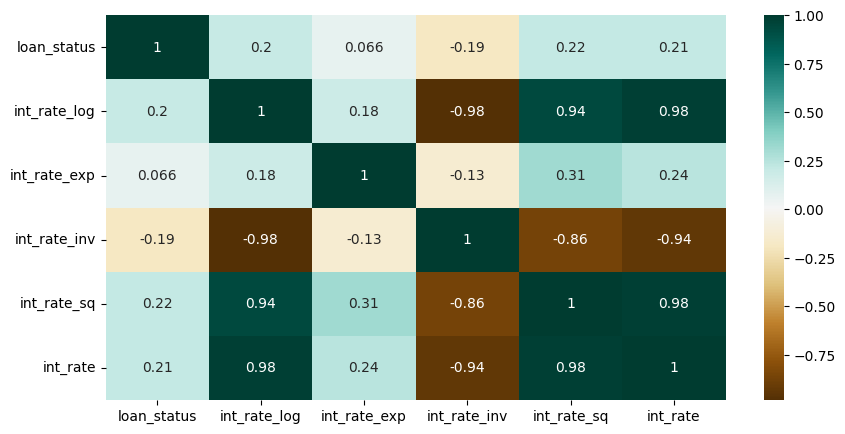

In [83]:
df['int_rate_log'] = np.log(df['int_rate']) 
df['int_rate_exp'] = np.exp(df['int_rate']) 
df['int_rate_inv'] = 1/(df['int_rate']) 
df['int_rate_sq'] = df['int_rate'] * df['int_rate'] 
plt.figure(figsize=(10,5)) 
c= df[['loan_status','int_rate_log','int_rate_exp','int_rate_inv','int_rate_sq','int_rate']].corr()
sns.heatmap(c,cmap="BrBG",annot=True) 

<Axes: >

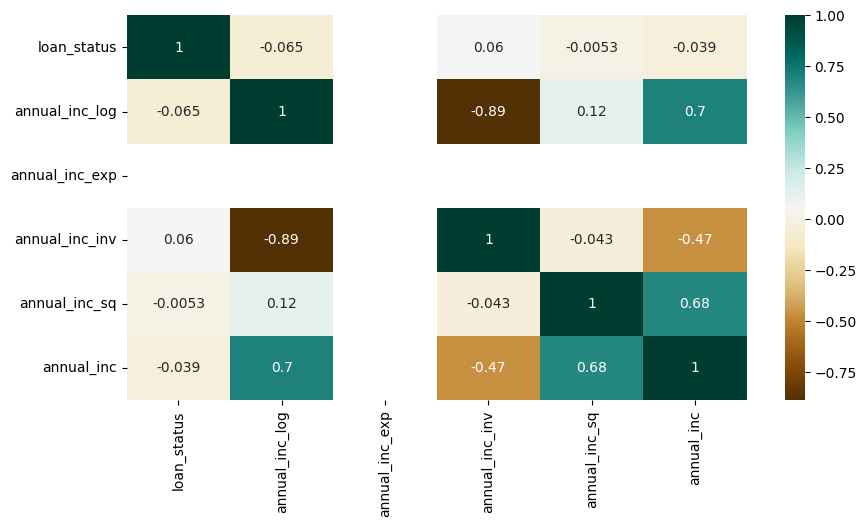

In [84]:
df['annual_inc_log'] = np.log(df['annual_inc'])
df['annual_inc_exp'] = np.exp(df['annual_inc'])
df['annual_inc_inv'] = 1 / df['annual_inc']
df['annual_inc_sq'] = df['annual_inc'] * df['annual_inc']

plt.figure(figsize=(10, 5))
c = df[['loan_status', 'annual_inc_log', 'annual_inc_exp', 'annual_inc_inv', 'annual_inc_sq', 'annual_inc']].corr()
sns.heatmap(c, cmap="BrBG", annot=True)

### Segmented bivariate analysis

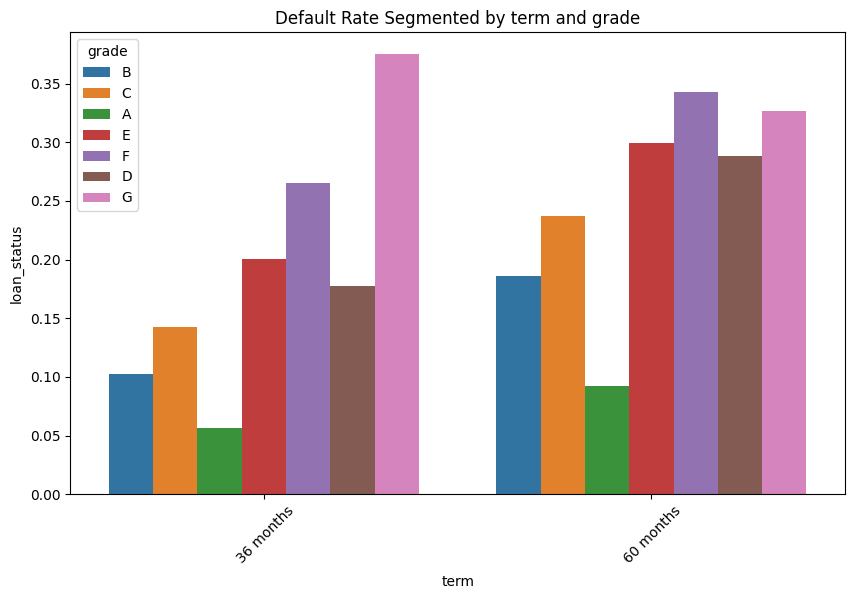

In [110]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='grade', data=df, ci=None)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.title(f'Default Rate Segmented by {cat_var} and grade')
    plt.show()

# Example usage:
plot_segmented('term')

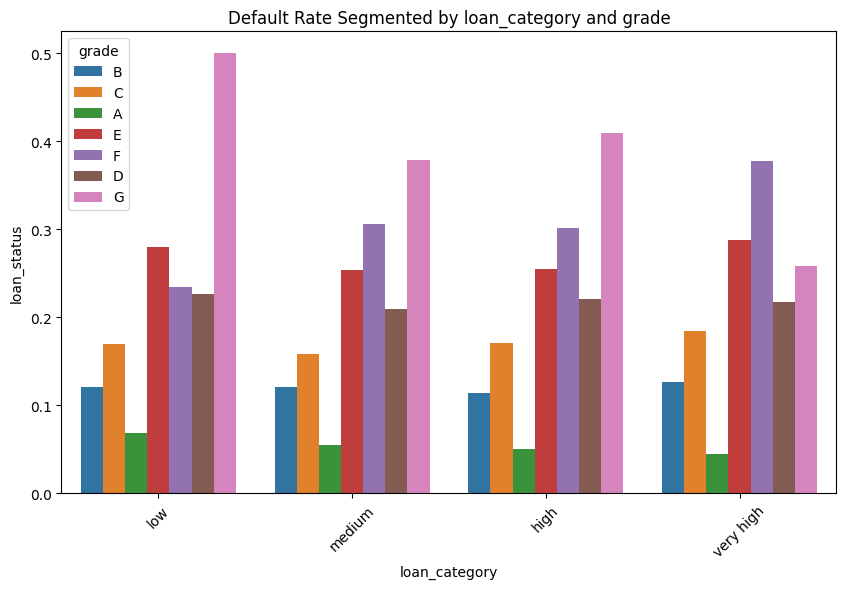

In [111]:
plot_segmented('loan_category')

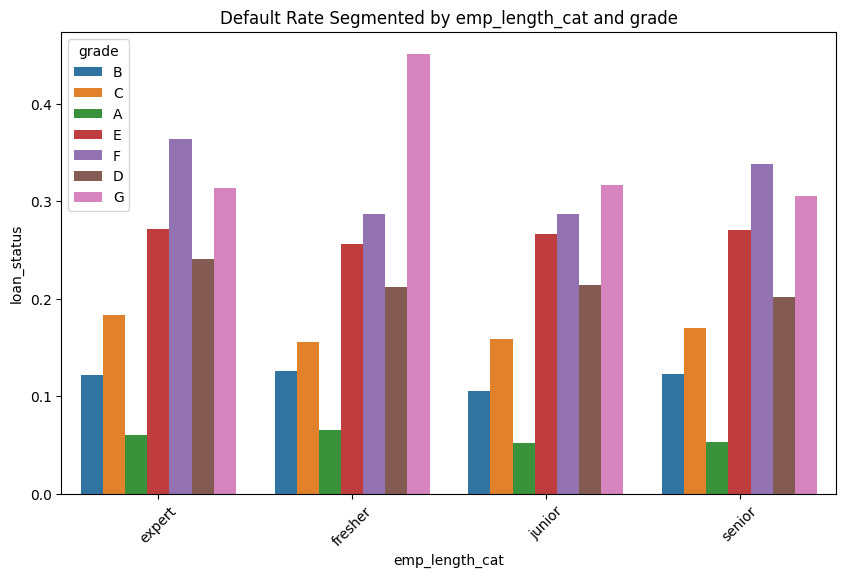

In [112]:
plot_segmented('emp_length_cat')

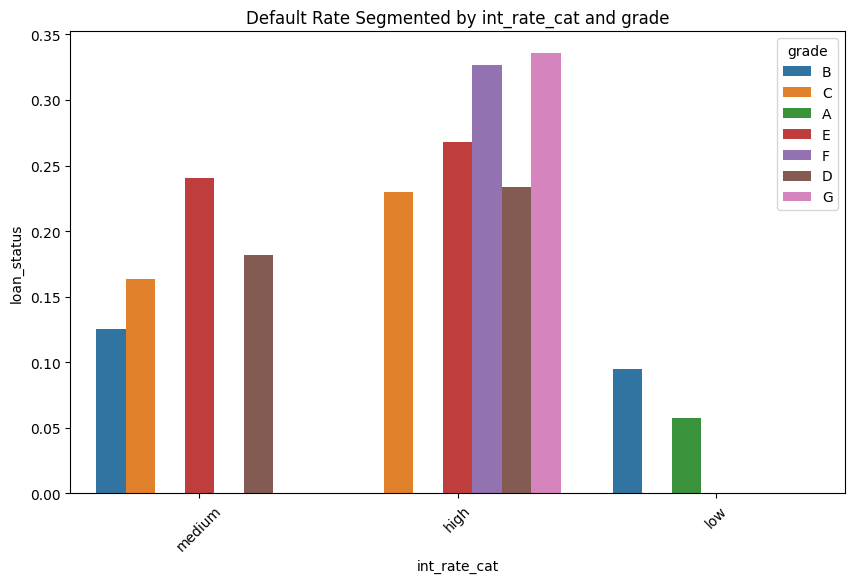

In [113]:
plot_segmented('int_rate_cat')

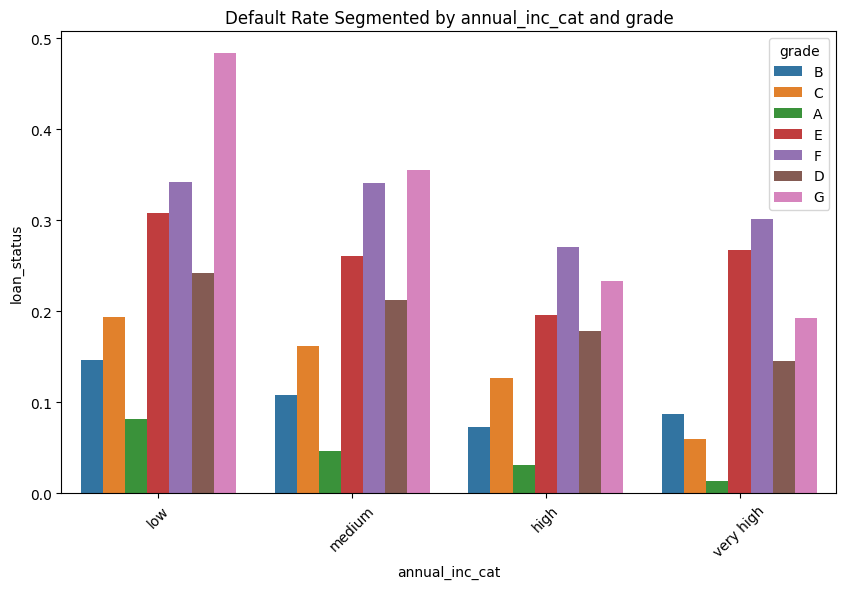

In [114]:
plot_segmented('annual_inc_cat')

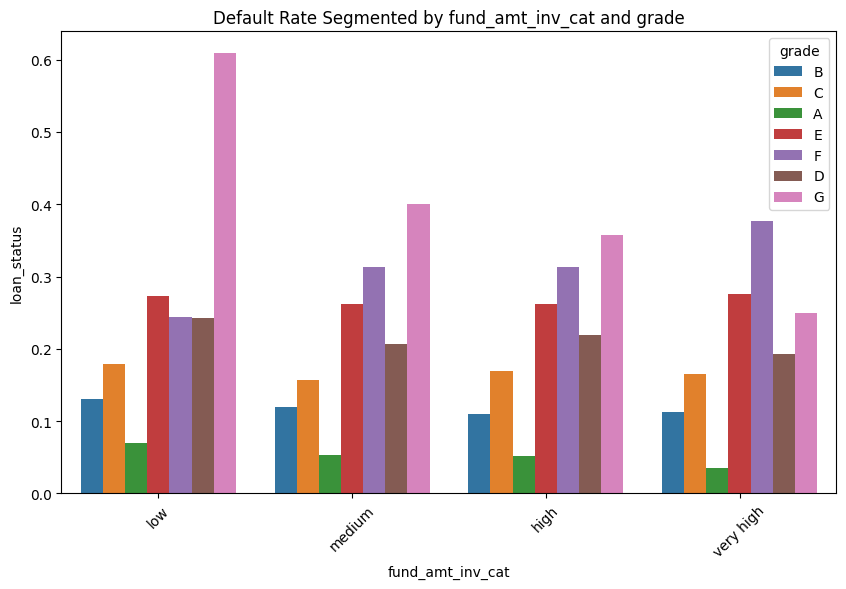

In [115]:
plot_segmented('fund_amt_inv_cat')

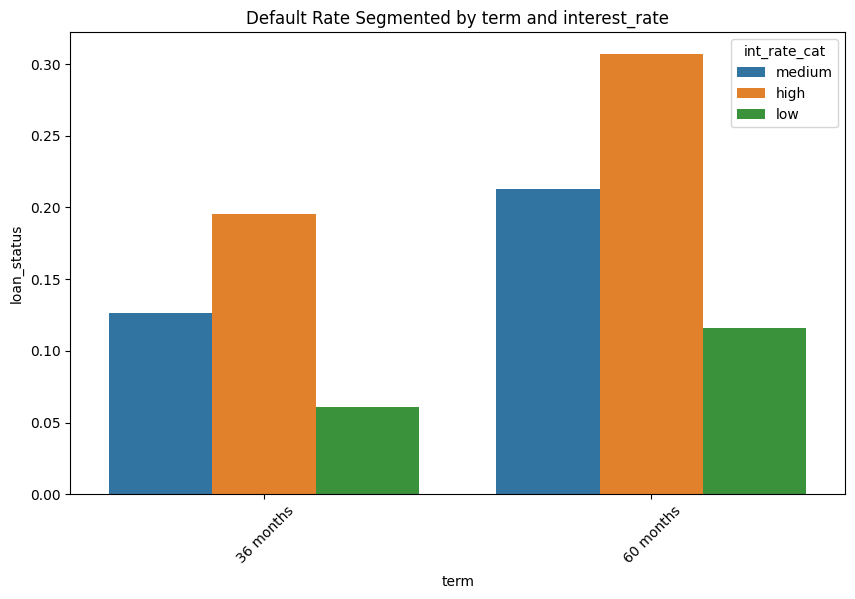

In [116]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='int_rate_cat', data=df, ci=None)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.title(f'Default Rate Segmented by {cat_var} and interest_rate')
    plt.show()

# Example usage:
plot_segmented('term')

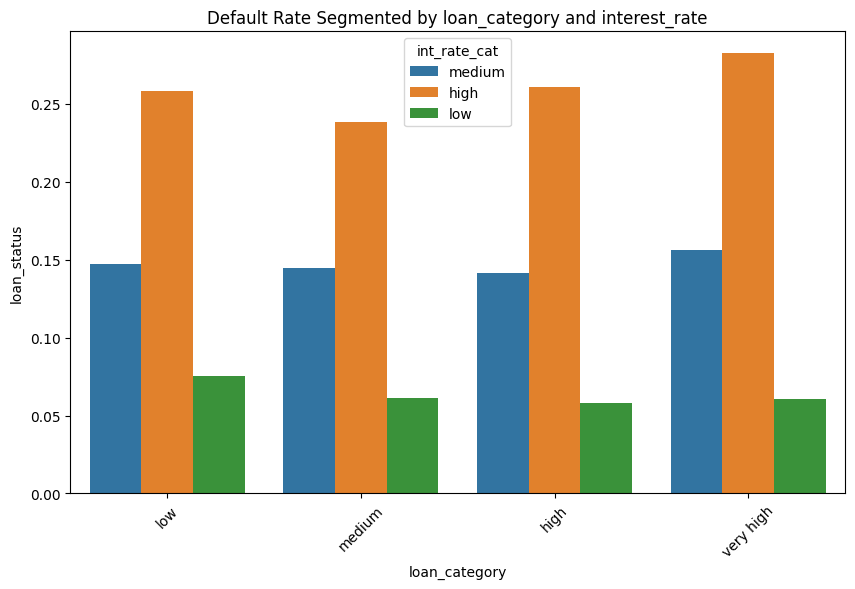

In [117]:
plot_segmented('loan_category')

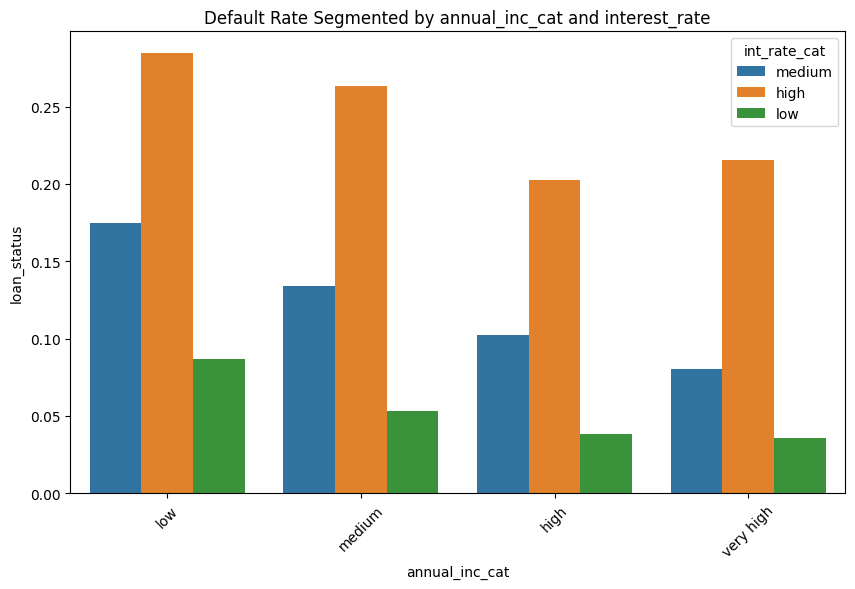

In [118]:
plot_segmented('annual_inc_cat')

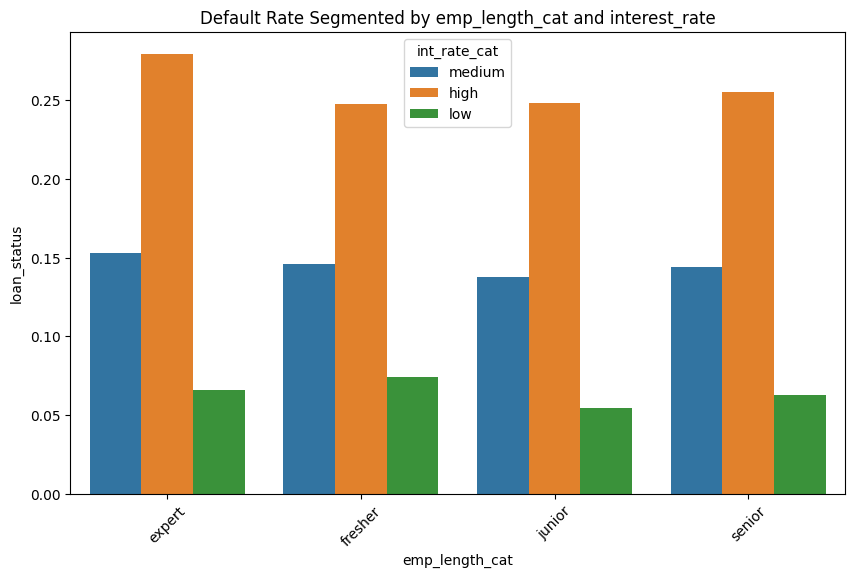

In [119]:
plot_segmented('emp_length_cat')

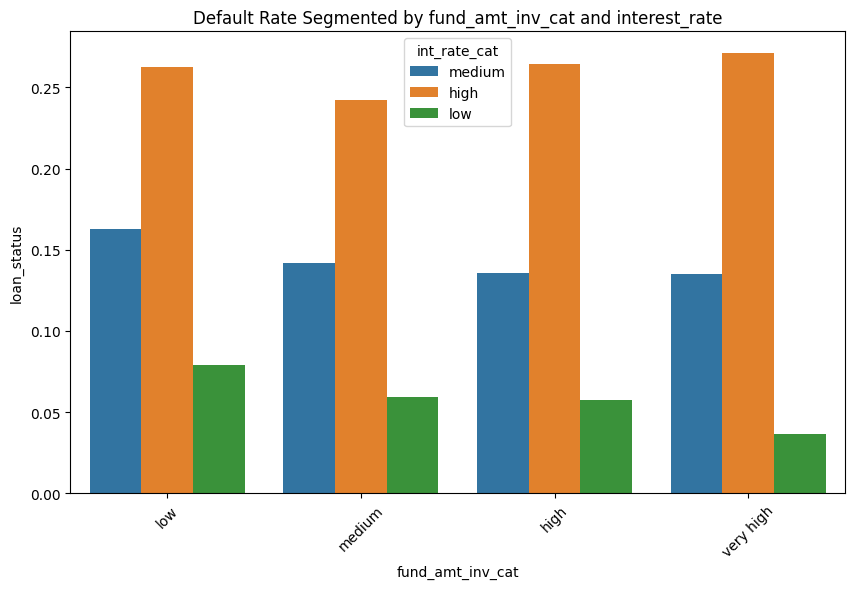

In [120]:
plot_segmented('fund_amt_inv_cat')

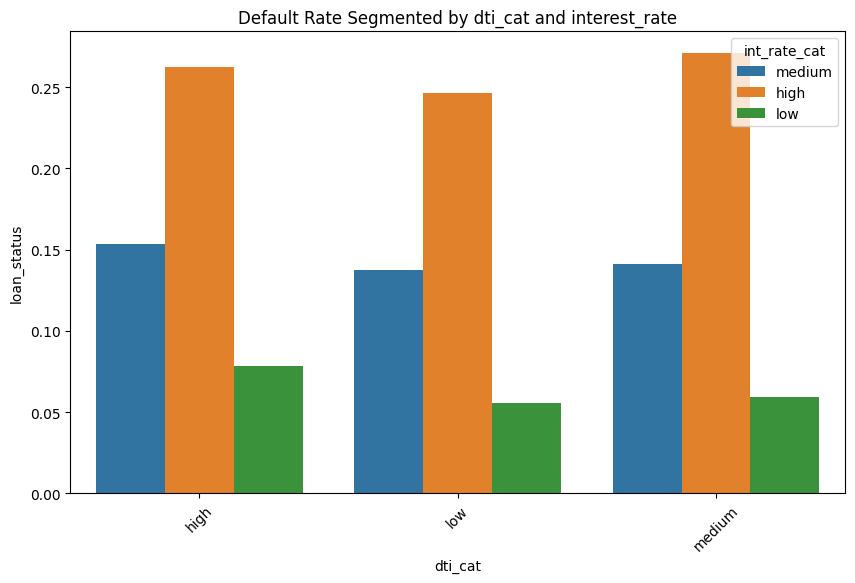

In [121]:
plot_segmented('dti_cat')

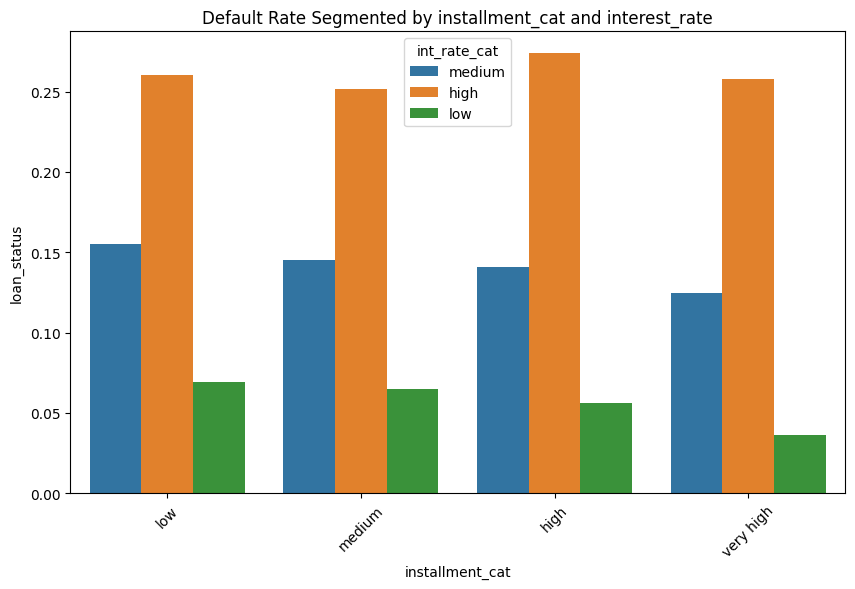

In [122]:
plot_segmented('installment_cat')